🔧 PREDICTIVE MAINTENANCE SYSTEM - COMPREHENSIVE ANALYSIS
This system uses ML algorithms to monitor equipment and forecast failures
Minimizes downtime and extends machinery lifespan for significant cost savings

📊 STEP 1: GENERATING SYNTHETIC PREDICTIVE MAINTENANCE DATASET
------------------------------------------------------------
✅ Generated 5000 samples with 10 features
📈 Overall failure rate: 5.78%
🏭 Equipment types: 6
📊 Feature summary: 9 sensor/operational features + 1 target

📋 DATASET OVERVIEW:
     equipment_id  equipment_age_days  temperature_celsius  \
0       MOTOR_002          246.660644            72.195077   
1  COMPRESSOR_001          390.182159            74.472978   
2       MOTOR_001         1722.039060            81.063066   
3  COMPRESSOR_001           34.441829            91.171552   
4  COMPRESSOR_001          522.513971            66.457289   
5        PUMP_002           38.497449            79.352591   
6       MOTOR_001          235.377098            65.506695

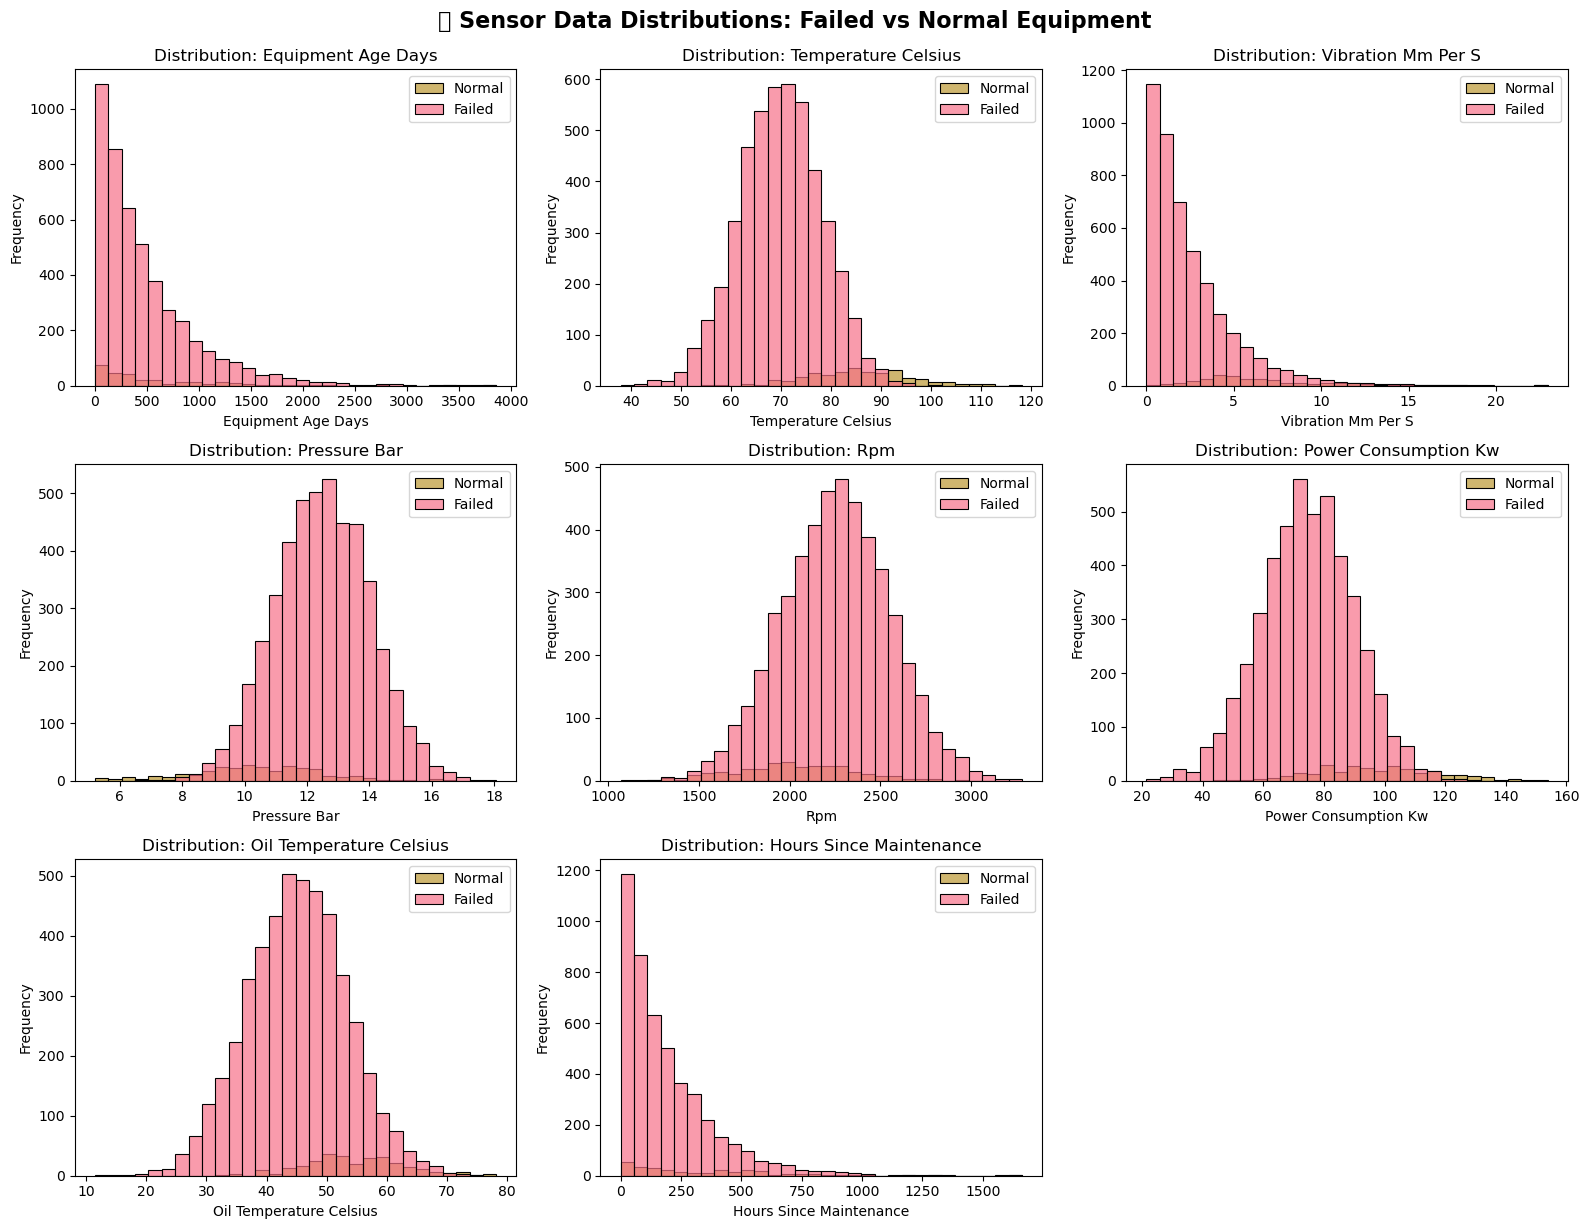

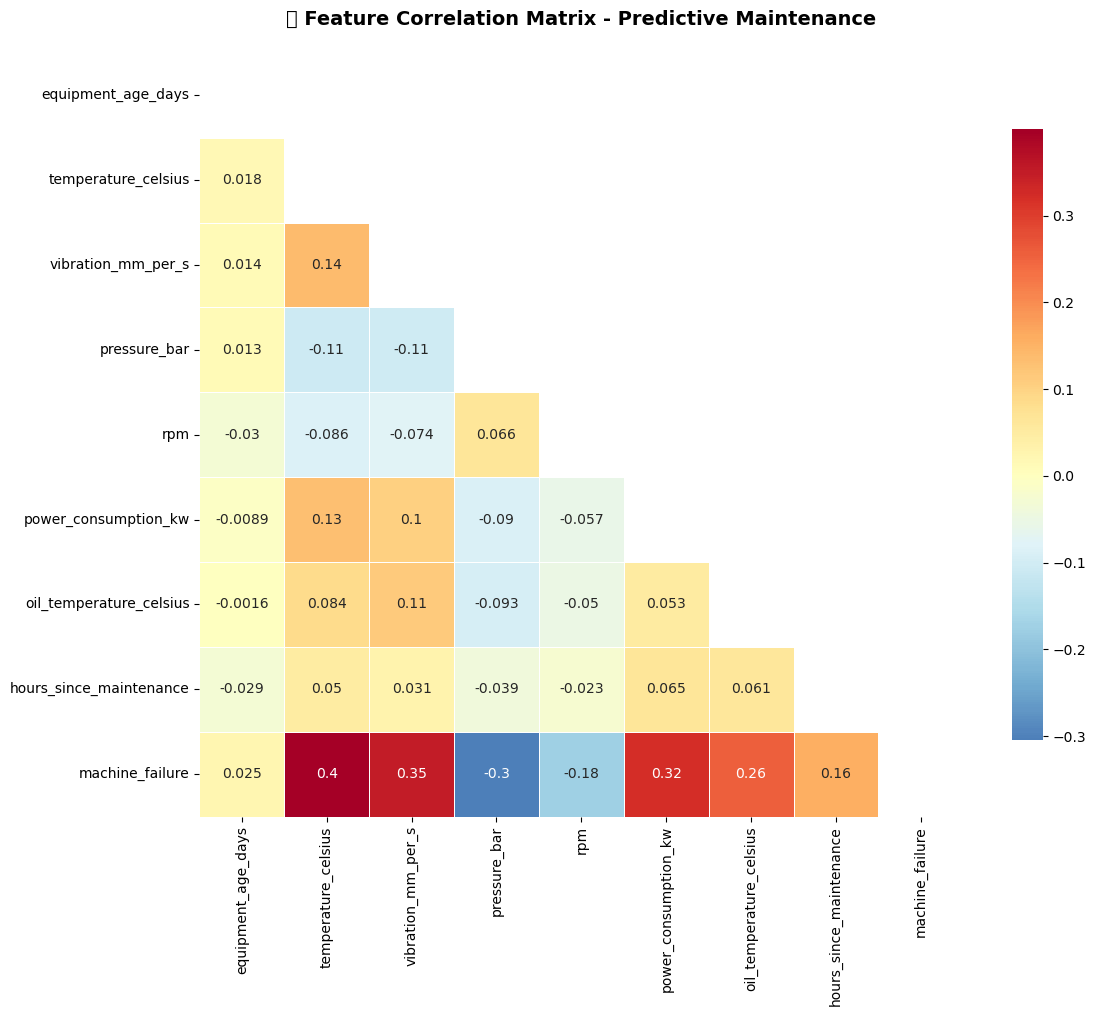

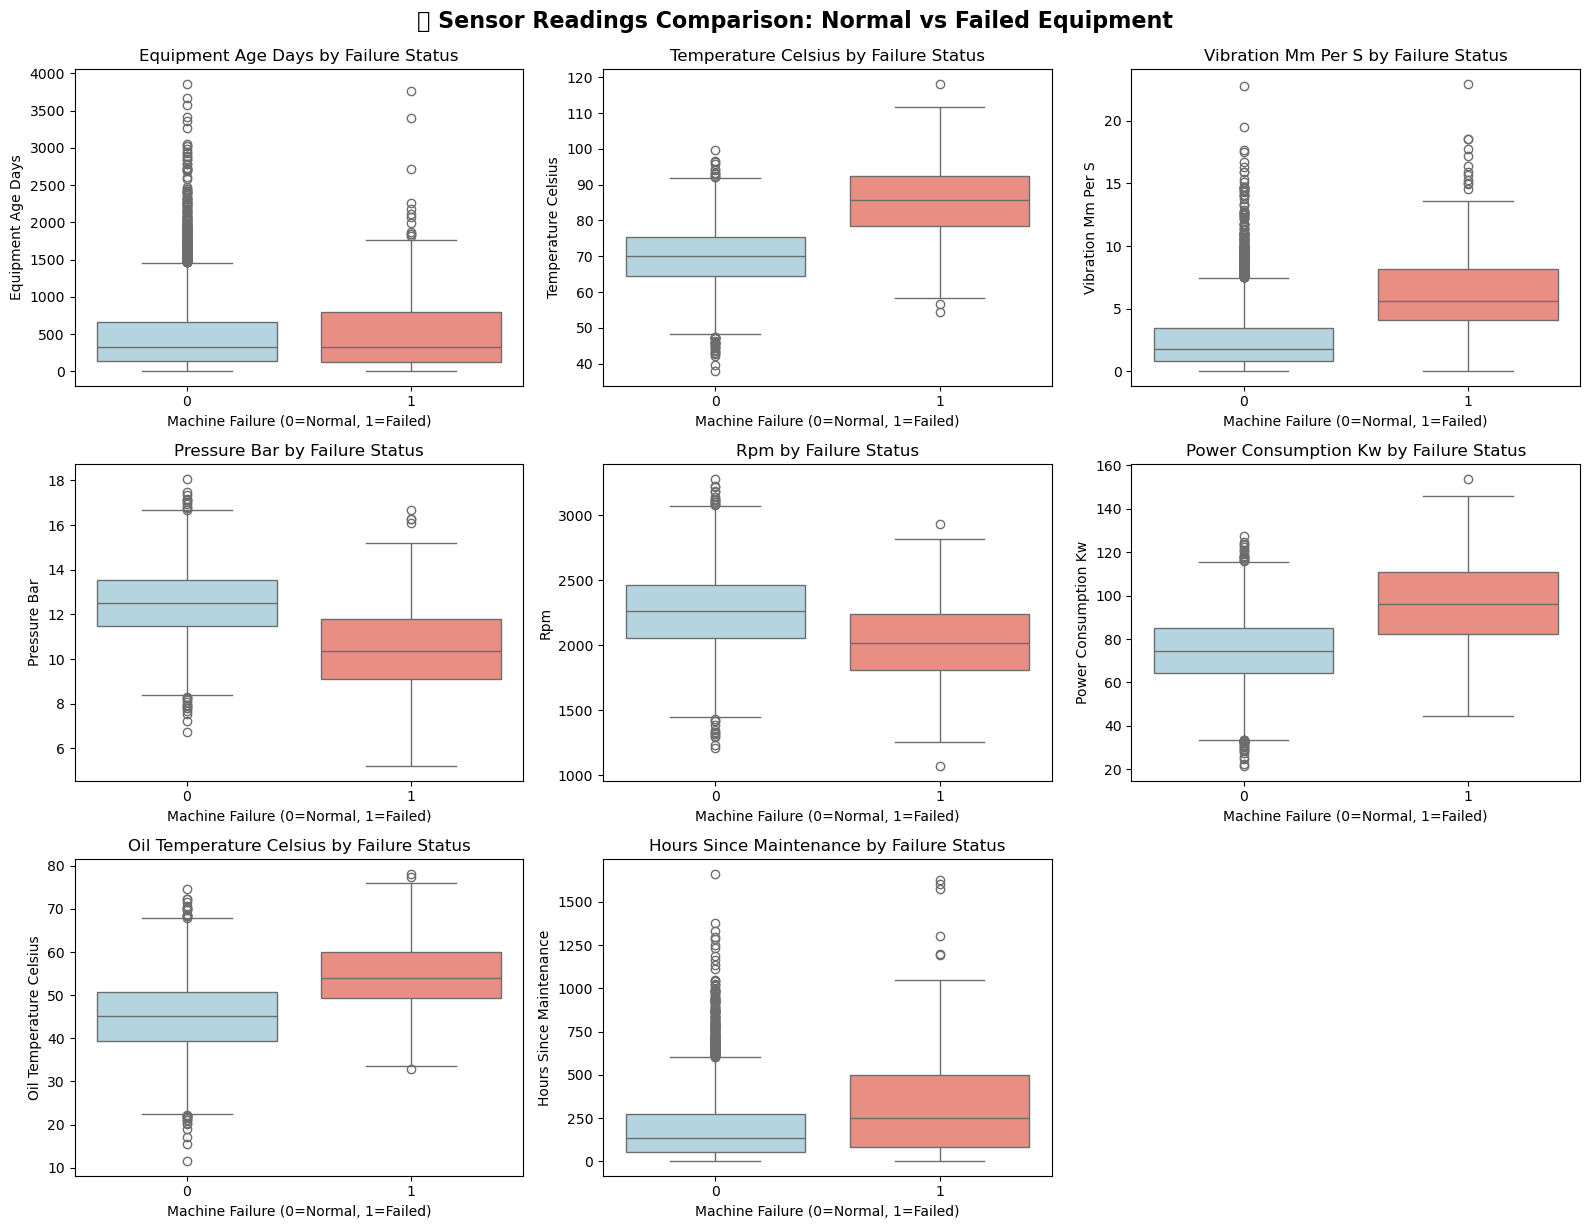

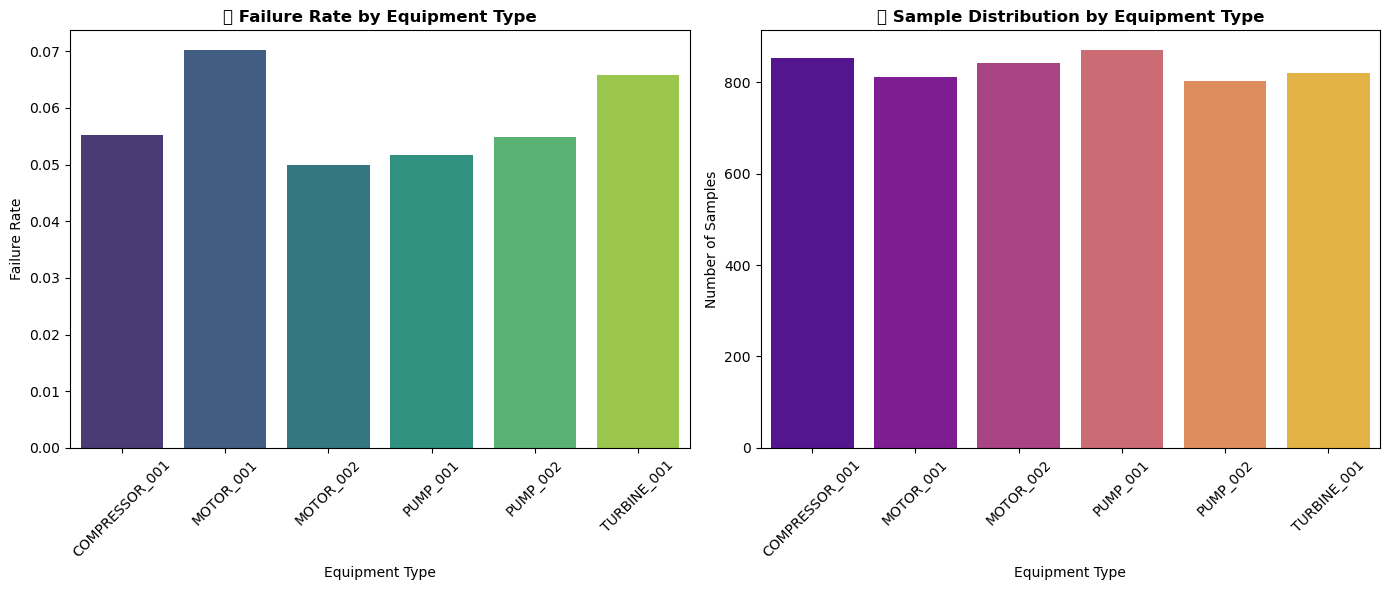

<Figure size 1200x1000 with 0 Axes>

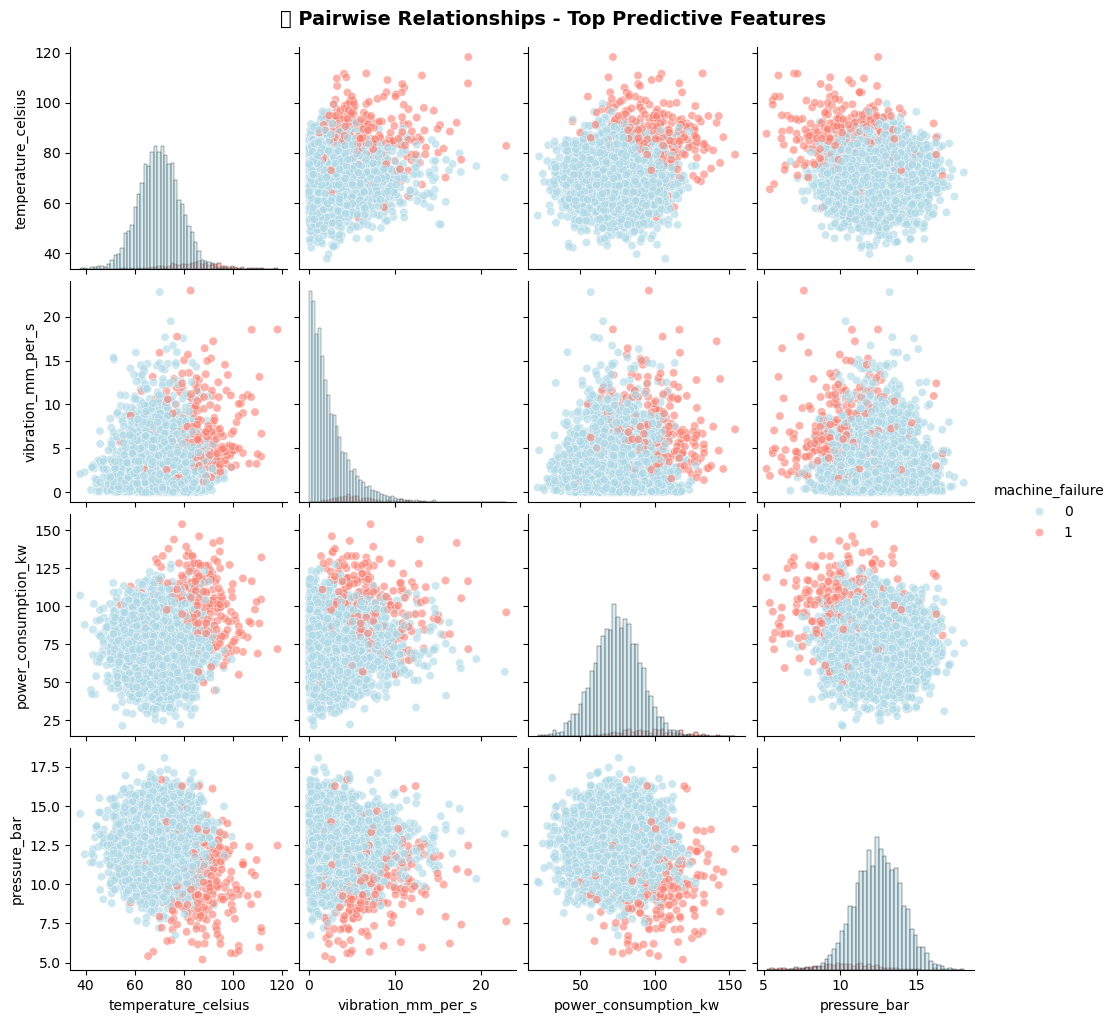


⚙️ STEP 3: FEATURE ENGINEERING AND SELECTION
------------------------------------------------------------
✅ Feature engineering completed
📊 Original features: 8
🔧 Engineered features: 11
📈 Total features for modeling: 19

🎯 TOP SELECTED FEATURES:
                    feature        score
6           temp_risk_score  1603.775868
11      combined_risk_score  1175.365496
0       temperature_celsius   950.446403
5            temp_deviation   888.957404
1        vibration_mm_per_s   694.781771
3      power_consumption_kw   571.932446
2              pressure_bar   511.520699
8      vibration_percentile   459.277361
9        pressure_deviation   446.454651
7      vibration_risk_score   430.587401
4   oil_temperature_celsius   351.871880
10      pressure_risk_score   229.194293

🤖 STEP 4: MACHINE LEARNING MODEL DEVELOPMENT
------------------------------------------------------------
✅ Data preparation completed
📊 Training samples: (4000, 12)
📊 Testing samples: (1000, 12)
📈 Training failure rat

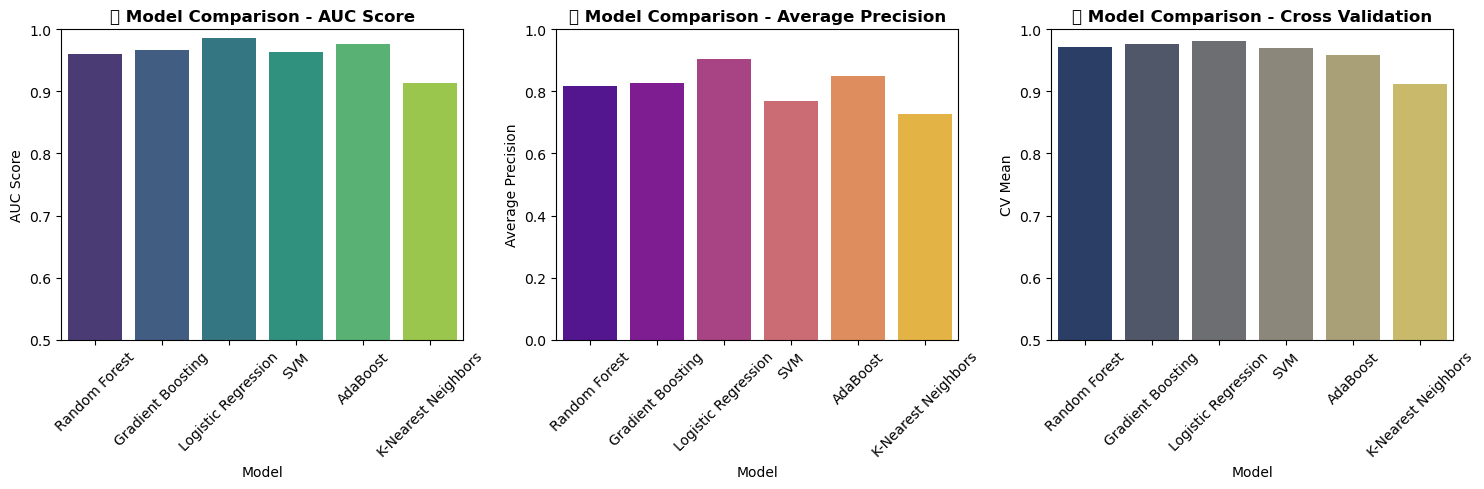

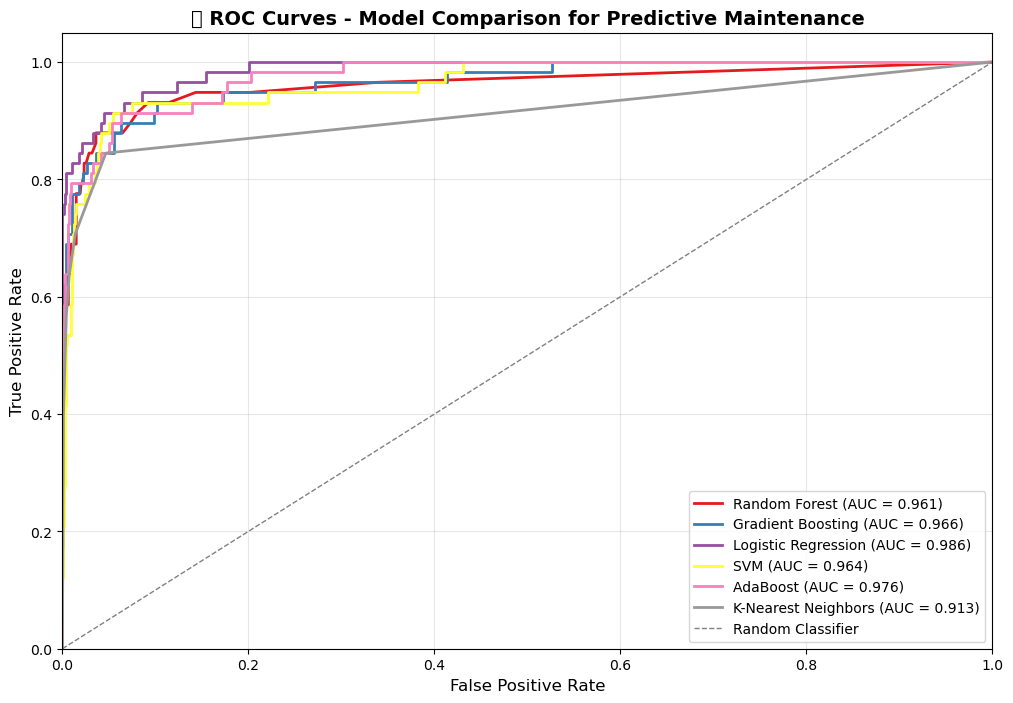

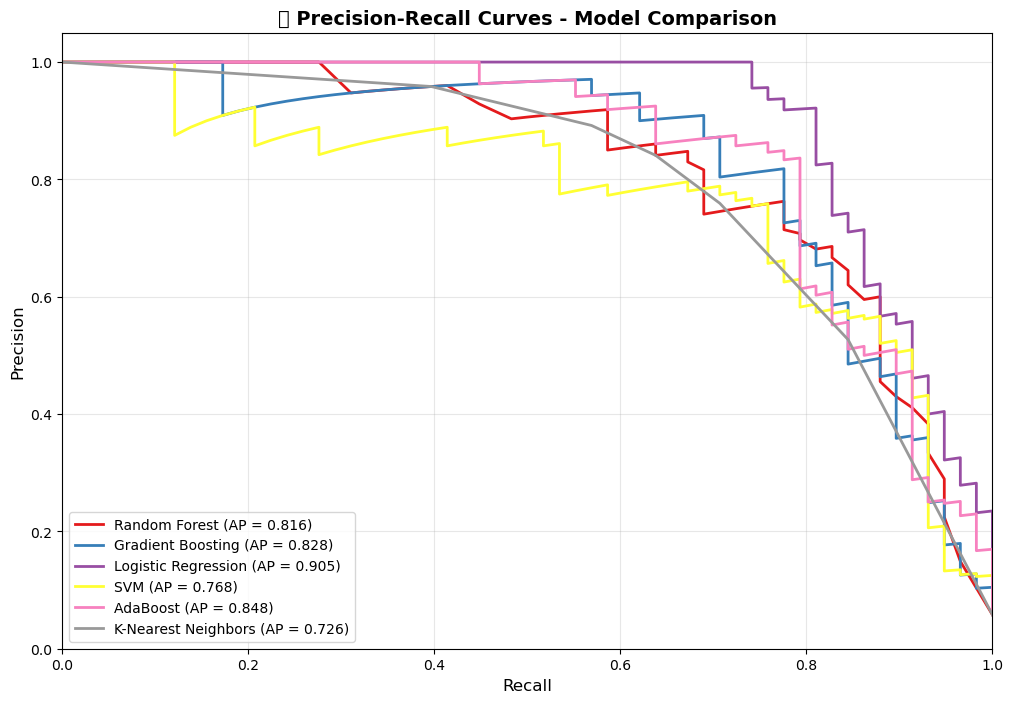

🏆 BEST MODEL: Logistic Regression
📊 AUC Score: 0.986
📊 Average Precision: 0.905


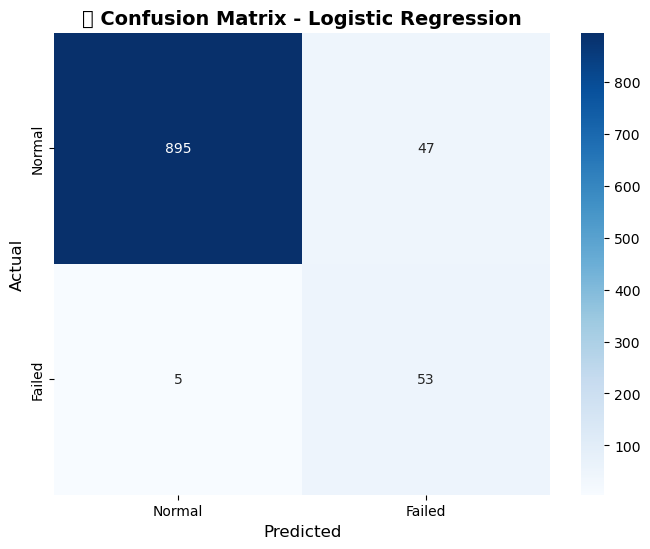


🔍 STEP 6: FEATURE IMPORTANCE ANALYSIS
------------------------------------------------------------

🚀 STEP 7: REAL-TIME PREDICTION SYSTEM
------------------------------------------------------------
🔮 EXAMPLE REAL-TIME PREDICTIONS:
----------------------------------------
TEST CASE 1 - Normal Equipment:
  🟢 Risk Level: LOW
  📊 Failure Probability: 3.22%
  🎯 Prediction: NORMAL OPERATION

TEST CASE 2 - Equipment with Warning Signs:
  🔴 Risk Level: HIGH
  📊 Failure Probability: 89.50%
  🎯 Prediction: FAILURE EXPECTED

🔧 STEP 8: MAINTENANCE RECOMMENDATIONS SYSTEM
------------------------------------------------------------
🔧 MAINTENANCE RECOMMENDATIONS:
  1. 🌡️ HIGH TEMPERATURE: Check cooling system, clean heat exchangers
  2. 📳 HIGH VIBRATION: Inspect bearings, check alignment, balance rotating parts
  3. ⚡ HIGH POWER USAGE: Check motor efficiency, inspect for mechanical binding
  4. 🛢️ HIGH OIL TEMPERATURE: Check oil level, inspect oil cooler, consider oil change
  5. 🔧 OVERDUE MAINTENA

In [1]:
# PREDICTIVE MAINTENANCE SYSTEM - COMPLETE JUPYTER NOTEBOOK
# ==========================================================
# This notebook demonstrates a comprehensive predictive maintenance solution
# using machine learning algorithms to monitor equipment and forecast failures
# 
# Key Features:
# - Equipment sensor data analysis
# - Multiple ML algorithms comparison  
# - Feature importance analysis
# - Performance visualization with seaborn
# - Real-time failure prediction capabilities

# ==========================================================

# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, precision_recall_curve, average_precision_score)
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set styling for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("🔧 PREDICTIVE MAINTENANCE SYSTEM - COMPREHENSIVE ANALYSIS")
print("=" * 70)
print("This system uses ML algorithms to monitor equipment and forecast failures")
print("Minimizes downtime and extends machinery lifespan for significant cost savings")
print("=" * 70)

# =====================================================================
# SECTION 1: DATA GENERATION AND PREPROCESSING
# =====================================================================

def generate_predictive_maintenance_dataset(n_samples=5000):
    """
    Generate a comprehensive synthetic dataset for predictive maintenance
    simulating real-world industrial equipment with multiple sensor readings
    
    This function creates realistic equipment data based on industrial patterns:
    - Temperature sensors (critical for overheating detection)
    - Vibration analysis (mechanical wear indicators)
    - Pressure monitoring (system health)
    - RPM tracking (motor performance)
    - Power consumption (efficiency metrics)
    - Oil temperature (lubrication health)
    - Maintenance scheduling data
    
    Parameters:
    -----------
    n_samples : int, default=5000
        Number of samples to generate
    
    Returns:
    --------
    pd.DataFrame
        Generated dataset with equipment sensor data and failure labels
    """
    print("\n📊 STEP 1: GENERATING SYNTHETIC PREDICTIVE MAINTENANCE DATASET")
    print("-" * 60)
    
    # Equipment identifiers - Different types of industrial equipment
    equipment_types = ['PUMP_001', 'PUMP_002', 'MOTOR_001', 'MOTOR_002', 
                      'COMPRESSOR_001', 'TURBINE_001']
    equipment_ids = np.random.choice(equipment_types, n_samples)
    
    # Equipment age (days in service) - Exponential distribution reflects real equipment lifecycle
    equipment_age = np.random.exponential(scale=500, size=n_samples)
    
    # Temperature sensors (°C) - Critical parameter for equipment health
    # Normal operating range: 60-80°C, failures tend to run hotter
    temp_base = np.random.normal(70, 8, n_samples)
    temp_noise = np.random.normal(0, 2, n_samples)
    
    # Vibration sensors (mm/s) - Key indicator of mechanical issues
    # Normal range: 0-5 mm/s, higher values indicate bearing/alignment problems
    vibration_base = np.random.exponential(2.5, n_samples)
    vibration_noise = np.random.normal(0, 0.5, n_samples)
    
    # Pressure sensors (bar) - System pressure health indicator
    # Normal operating pressure: 10-15 bar
    pressure_base = np.random.normal(12.5, 1.5, n_samples)
    pressure_noise = np.random.normal(0, 0.3, n_samples)
    
    # RPM (rotations per minute) - Motor/pump speed indicator
    # Normal range: 1500-3000 RPM
    rpm_base = np.random.normal(2250, 300, n_samples)
    rpm_noise = np.random.normal(0, 50, n_samples)
    
    # Power consumption (kW) - Efficiency and load indicator
    power_base = np.random.normal(75, 15, n_samples)
    power_noise = np.random.normal(0, 3, n_samples)
    
    # Oil temperature (°C) - Lubrication system health
    oil_temp_base = np.random.normal(45, 8, n_samples)
    oil_temp_noise = np.random.normal(0, 2, n_samples)
    
    # Operating hours since last maintenance - Maintenance scheduling factor
    hours_since_maintenance = np.random.exponential(200, n_samples)
    
    # Generate realistic failure labels based on physics-based conditions
    # Higher probability of failure with multiple risk factors
    failure_probability = (
        0.1 * (temp_base > 85) +              # Overheating risk
        0.15 * (vibration_base > 6) +         # Mechanical stress
        0.05 * (equipment_age > 1000) +       # Age-related degradation
        0.08 * (np.abs(pressure_base - 12.5) > 3) +  # Pressure anomalies
        0.12 * (hours_since_maintenance > 400) +     # Overdue maintenance
        0.1 * (power_base > 100)              # Overload conditions
    )
    
    # Add random component to simulate unpredictable failures
    failure_probability += np.random.normal(0, 0.05, n_samples)
    failure_probability = np.clip(failure_probability, 0, 1)
    
    # Generate binary failure labels
    machine_failure = np.random.binomial(1, failure_probability, n_samples)
    
    # Adjust sensor readings based on failure status - Failed machines show degraded patterns
    temperature = temp_base + temp_noise + machine_failure * np.random.normal(15, 5, n_samples)
    vibration = vibration_base + vibration_noise + machine_failure * np.random.normal(3, 1, n_samples)
    pressure = pressure_base + pressure_noise + machine_failure * np.random.normal(-2, 1, n_samples)
    rpm = rpm_base + rpm_noise + machine_failure * np.random.normal(-200, 100, n_samples)
    power_consumption = power_base + power_noise + machine_failure * np.random.normal(20, 10, n_samples)
    oil_temperature = oil_temp_base + oil_temp_noise + machine_failure * np.random.normal(10, 3, n_samples)
    
    # Create comprehensive DataFrame
    data = pd.DataFrame({
        'equipment_id': equipment_ids,
        'equipment_age_days': equipment_age,
        'temperature_celsius': temperature,
        'vibration_mm_per_s': np.abs(vibration),  # Physical constraint: vibration ≥ 0
        'pressure_bar': pressure,
        'rpm': np.abs(rpm),  # Physical constraint: RPM ≥ 0
        'power_consumption_kw': power_consumption,
        'oil_temperature_celsius': oil_temperature,
        'hours_since_maintenance': hours_since_maintenance,
        'machine_failure': machine_failure
    })
    
    print(f"✅ Generated {n_samples} samples with {data.shape[1]} features")
    print(f"📈 Overall failure rate: {machine_failure.mean():.2%}")
    print(f"🏭 Equipment types: {len(np.unique(equipment_ids))}")
    print(f"📊 Feature summary: {data.shape[1]-1} sensor/operational features + 1 target")
    
    return data

# Generate the dataset
df = generate_predictive_maintenance_dataset(5000)

# Display comprehensive dataset information
print("\n📋 DATASET OVERVIEW:")
print(df.head(10))
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"\n📈 Data Types:\n{df.dtypes}")
print(f"\n🎯 Target Distribution:\n{df['machine_failure'].value_counts()}")
print(f"\n📉 Missing Values:\n{df.isnull().sum()}")

# =====================================================================
# SECTION 2: EXPLORATORY DATA ANALYSIS WITH SEABORN
# =====================================================================

print("\n📊 STEP 2: EXPLORATORY DATA ANALYSIS WITH SEABORN")
print("-" * 60)

# Prepare data for visualization
le = LabelEncoder()
df_encoded = df.copy()
df_encoded['equipment_id_encoded'] = le.fit_transform(df['equipment_id'])

# Define numerical features for analysis
numerical_features = ['equipment_age_days', 'temperature_celsius', 'vibration_mm_per_s', 
                     'pressure_bar', 'rpm', 'power_consumption_kw', 
                     'oil_temperature_celsius', 'hours_since_maintenance']

# 1. DISTRIBUTION ANALYSIS
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    
    # Create distribution plots for failed vs normal equipment
    sns.histplot(data=df, x=feature, hue='machine_failure', bins=30, alpha=0.7)
    plt.title(f'Distribution: {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.legend(['Normal', 'Failed'])

plt.tight_layout()
plt.suptitle('🔍 Sensor Data Distributions: Failed vs Normal Equipment', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 2. CORRELATION HEATMAP
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded[numerical_features + ['machine_failure']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('🔗 Feature Correlation Matrix - Predictive Maintenance', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 3. BOX PLOTS FOR FAILURE COMPARISON
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    
    sns.boxplot(data=df, x='machine_failure', y=feature, palette=['lightblue', 'salmon'])
    plt.title(f'{feature.replace("_", " ").title()} by Failure Status')
    plt.xlabel('Machine Failure (0=Normal, 1=Failed)')
    plt.ylabel(feature.replace("_", " ").title())

plt.tight_layout()
plt.suptitle('📊 Sensor Readings Comparison: Normal vs Failed Equipment', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# 4. EQUIPMENT TYPE FAILURE ANALYSIS
plt.figure(figsize=(14, 6))

# Equipment failure rates
equipment_stats = df.groupby('equipment_id')['machine_failure'].agg(['count', 'sum', 'mean']).reset_index()
equipment_stats.columns = ['equipment_id', 'total_samples', 'failures', 'failure_rate']

plt.subplot(1, 2, 1)
sns.barplot(data=equipment_stats, x='equipment_id', y='failure_rate', palette='viridis')
plt.title('🏭 Failure Rate by Equipment Type', fontweight='bold')
plt.xlabel('Equipment Type')
plt.ylabel('Failure Rate')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=equipment_stats, x='equipment_id', y='total_samples', palette='plasma')
plt.title('📊 Sample Distribution by Equipment Type', fontweight='bold')
plt.xlabel('Equipment Type')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. PAIRWISE RELATIONSHIPS
# Select most correlated features for detailed analysis
top_features = ['temperature_celsius', 'vibration_mm_per_s', 'power_consumption_kw', 'pressure_bar']

plt.figure(figsize=(12, 10))
sns.pairplot(df[top_features + ['machine_failure']], 
             hue='machine_failure', 
             palette=['lightblue', 'salmon'],
             diag_kind='hist',
             plot_kws={'alpha': 0.6})
plt.suptitle('🔍 Pairwise Relationships - Top Predictive Features', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

# =====================================================================
# SECTION 3: FEATURE ENGINEERING AND SELECTION
# =====================================================================

print("\n⚙️ STEP 3: FEATURE ENGINEERING AND SELECTION")
print("-" * 60)

# Create additional engineered features based on domain knowledge
df_features = df.copy()

# Temperature-based features
df_features['temp_deviation'] = np.abs(df_features['temperature_celsius'] - 70)  # Deviation from normal 70°C
df_features['temp_risk_score'] = (df_features['temperature_celsius'] > 85).astype(int)

# Vibration-based features
df_features['vibration_risk_score'] = (df_features['vibration_mm_per_s'] > 5).astype(int)
df_features['vibration_percentile'] = df_features['vibration_mm_per_s'].rank(pct=True)

# Pressure-based features
df_features['pressure_deviation'] = np.abs(df_features['pressure_bar'] - 12.5)  # Normal pressure is 12.5 bar
df_features['pressure_risk_score'] = (df_features['pressure_deviation'] > 2).astype(int)

# Maintenance-based features
df_features['maintenance_overdue'] = (df_features['hours_since_maintenance'] > 300).astype(int)
df_features['maintenance_urgency'] = df_features['hours_since_maintenance'] / 400  # Normalize to 0-1 scale

# Age-based features
df_features['age_risk_score'] = (df_features['equipment_age_days'] > 1000).astype(int)

# Combined risk score
df_features['combined_risk_score'] = (
    df_features['temp_risk_score'] + 
    df_features['vibration_risk_score'] + 
    df_features['pressure_risk_score'] + 
    df_features['maintenance_overdue'] + 
    df_features['age_risk_score']
)

# Encode categorical variables
df_features['equipment_id_encoded'] = le.fit_transform(df_features['equipment_id'])

print(f"✅ Feature engineering completed")
print(f"📊 Original features: {len(numerical_features)}")
print(f"🔧 Engineered features: {df_features.shape[1] - df.shape[1]}")
print(f"📈 Total features for modeling: {df_features.shape[1] - 2}")  # Exclude equipment_id and target

# Feature selection using statistical tests
feature_columns = [col for col in df_features.columns 
                  if col not in ['equipment_id', 'machine_failure']]

X = df_features[feature_columns]
y = df_features['machine_failure']

# Select top features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=12)
X_selected = selector.fit_transform(X, y)
selected_features = [feature_columns[i] for i in selector.get_support(indices=True)]

print(f"\n🎯 TOP SELECTED FEATURES:")
feature_scores = pd.DataFrame({
    'feature': selected_features,
    'score': selector.scores_[selector.get_support()]
}).sort_values('score', ascending=False)

print(feature_scores)

# =====================================================================
# SECTION 4: MACHINE LEARNING MODEL DEVELOPMENT
# =====================================================================

print("\n🤖 STEP 4: MACHINE LEARNING MODEL DEVELOPMENT")
print("-" * 60)

# Prepare data for modeling
X_final = df_features[selected_features]
y_final = df_features['machine_failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# Scale features for algorithms that require normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data preparation completed")
print(f"📊 Training samples: {X_train.shape}")
print(f"📊 Testing samples: {X_test.shape}")
print(f"📈 Training failure rate: {y_train.mean():.2%}")
print(f"📈 Testing failure rate: {y_test.mean():.2%}")

# Define multiple ML algorithms for comparison
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate all models
model_results = {}
model_objects = {}

print(f"\n🎯 TRAINING AND EVALUATING MODELS:")
print("-" * 40)

for name, model in models.items():
    print(f"Training {name}...")
    
    # Use scaled data for SVM, Logistic Regression, and KNN
    if name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    
    # Cross-validation for robust performance estimation
    if name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    model_results[name] = {
        'auc_score': auc_score,
        'avg_precision': avg_precision,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    model_objects[name] = model
    
    print(f"  ✅ {name}: AUC = {auc_score:.3f}, CV = {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# =====================================================================
# SECTION 5: MODEL PERFORMANCE VISUALIZATION
# =====================================================================

print("\n📊 STEP 5: MODEL PERFORMANCE VISUALIZATION")
print("-" * 60)

# 1. MODEL COMPARISON BAR PLOT
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'AUC Score': [model_results[model]['auc_score'] for model in model_results.keys()],
    'Average Precision': [model_results[model]['avg_precision'] for model in model_results.keys()],
    'CV Mean': [model_results[model]['cv_mean'] for model in model_results.keys()]
})

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=results_df, x='Model', y='AUC Score', palette='viridis')
plt.title('🎯 Model Comparison - AUC Score', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)

plt.subplot(1, 3, 2)
sns.barplot(data=results_df, x='Model', y='Average Precision', palette='plasma')
plt.title('🎯 Model Comparison - Average Precision', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)

plt.subplot(1, 3, 3)
sns.barplot(data=results_df, x='Model', y='CV Mean', palette='cividis')
plt.title('🎯 Model Comparison - Cross Validation', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

# 2. ROC CURVES COMPARISON
plt.figure(figsize=(12, 8))
colors = plt.cm.Set1(np.linspace(0, 1, len(models)))

for i, (name, results) in enumerate(model_results.items()):
    fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
    plt.plot(fpr, tpr, color=colors[i], lw=2, 
             label=f'{name} (AUC = {results["auc_score"]:.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('📈 ROC Curves - Model Comparison for Predictive Maintenance', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 3. PRECISION-RECALL CURVES
plt.figure(figsize=(12, 8))

for i, (name, results) in enumerate(model_results.items()):
    precision, recall, _ = precision_recall_curve(y_test, results['y_pred_proba'])
    plt.plot(recall, precision, color=colors[i], lw=2,
             label=f'{name} (AP = {results["avg_precision"]:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('📈 Precision-Recall Curves - Model Comparison', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

# Select best model based on AUC score
best_model_name = max(model_results.keys(), key=lambda k: model_results[k]['auc_score'])
best_model = model_objects[best_model_name]

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"📊 AUC Score: {model_results[best_model_name]['auc_score']:.3f}")
print(f"📊 Average Precision: {model_results[best_model_name]['avg_precision']:.3f}")

# 4. CONFUSION MATRIX FOR BEST MODEL
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, model_results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Failed'],
            yticklabels=['Normal', 'Failed'])
plt.title(f'🎯 Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

# =====================================================================
# SECTION 6: FEATURE IMPORTANCE ANALYSIS
# =====================================================================

print("\n🔍 STEP 6: FEATURE IMPORTANCE ANALYSIS")
print("-" * 60)

# Get feature importance from the best model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
    plt.title(f'🔍 Top 10 Feature Importance - {best_model_name}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Feature Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

# =====================================================================
# SECTION 7: REAL-TIME PREDICTION SYSTEM
# =====================================================================

print("\n🚀 STEP 7: REAL-TIME PREDICTION SYSTEM")
print("-" * 60)

def predict_equipment_failure(model, scaler, features_dict, feature_names, model_name):
    """
    Real-time prediction function for equipment failure
    
    Parameters:
    -----------
    model : trained ML model
    scaler : StandardScaler object
    features_dict : dict with sensor readings
    feature_names : list of feature names
    model_name : string, name of the model
    
    Returns:
    --------
    dict : prediction results with probability and risk level
    """
    # Create feature vector
    feature_vector = []
    for feature in feature_names:
        if feature in features_dict:
            feature_vector.append(features_dict[feature])
        else:
            # Use median values for missing features
            feature_vector.append(df_features[feature].median())
    
    feature_vector = np.array(feature_vector).reshape(1, -1)
    
    # Scale features if needed
    if model_name in ['SVM', 'Logistic Regression', 'K-Nearest Neighbors']:
        feature_vector = scaler.transform(feature_vector)
    
    # Make prediction
    failure_probability = model.predict_proba(feature_vector)[0, 1]
    prediction = model.predict(feature_vector)
    
    # Determine risk level
    if failure_probability < 0.3:
        risk_level = "LOW"
        risk_color = "🟢"
    elif failure_probability < 0.7:
        risk_level = "MEDIUM"
        risk_color = "🟡"
    else:
        risk_level = "HIGH"
        risk_color = "🔴"
    
    return {
        'failure_probability': failure_probability,
        'prediction': prediction,
        'risk_level': risk_level,
        'risk_color': risk_color
    }

# Example real-time prediction
print("🔮 EXAMPLE REAL-TIME PREDICTIONS:")
print("-" * 40)

# Test case 1: Normal equipment
normal_equipment = {
    'temperature_celsius': 72.0,
    'vibration_mm_per_s': 2.1,
    'pressure_bar': 12.8,
    'power_consumption_kw': 76.0,
    'rpm': 2250.0,
    'oil_temperature_celsius': 45.0,
    'hours_since_maintenance': 150.0,
    'equipment_age_days': 300.0
}

result = predict_equipment_failure(best_model, scaler, normal_equipment, 
                                 selected_features, best_model_name)

print(f"TEST CASE 1 - Normal Equipment:")
print(f"  {result['risk_color']} Risk Level: {result['risk_level']}")
print(f"  📊 Failure Probability: {result['failure_probability']:.2%}")
print(f"  🎯 Prediction: {'FAILURE EXPECTED' if result['prediction'] else 'NORMAL OPERATION'}")

# Test case 2: Equipment showing warning signs
warning_equipment = {
    'temperature_celsius': 88.0,  # High temperature
    'vibration_mm_per_s': 6.2,   # High vibration
    'pressure_bar': 11.0,        # Low pressure
    'power_consumption_kw': 95.0, # High power consumption
    'rpm': 2100.0,               # Slightly low RPM
    'oil_temperature_celsius': 52.0,  # Elevated oil temperature
    'hours_since_maintenance': 420.0,  # Overdue maintenance
    'equipment_age_days': 1200.0  # Old equipment
}

result = predict_equipment_failure(best_model, scaler, warning_equipment, 
                                 selected_features, best_model_name)

print(f"\nTEST CASE 2 - Equipment with Warning Signs:")
print(f"  {result['risk_color']} Risk Level: {result['risk_level']}")
print(f"  📊 Failure Probability: {result['failure_probability']:.2%}")
print(f"  🎯 Prediction: {'FAILURE EXPECTED' if result['prediction'] else 'NORMAL OPERATION'}")

# =====================================================================
# SECTION 8: MAINTENANCE RECOMMENDATIONS
# =====================================================================

print("\n🔧 STEP 8: MAINTENANCE RECOMMENDATIONS SYSTEM")
print("-" * 60)

def generate_maintenance_recommendations(sensor_data, failure_probability):
    """
    Generate maintenance recommendations based on sensor data and failure probability
    
    Parameters:
    -----------
    sensor_data : dict with current sensor readings
    failure_probability : float, predicted failure probability
    
    Returns:
    --------
    list : maintenance recommendations
    """
    recommendations = []
    
    # Temperature-based recommendations
    if sensor_data.get('temperature_celsius', 0) > 85:
        recommendations.append("🌡️ HIGH TEMPERATURE: Check cooling system, clean heat exchangers")
    
    # Vibration-based recommendations  
    if sensor_data.get('vibration_mm_per_s', 0) > 5:
        recommendations.append("📳 HIGH VIBRATION: Inspect bearings, check alignment, balance rotating parts")
    
    # Pressure-based recommendations
    pressure = sensor_data.get('pressure_bar', 12.5)
    if abs(pressure - 12.5) > 2:
        if pressure < 10.5:
            recommendations.append("📉 LOW PRESSURE: Check for leaks, inspect seals and gaskets")
        else:
            recommendations.append("📈 HIGH PRESSURE: Check pressure relief valve, inspect system blockages")
    
    # Power consumption recommendations
    if sensor_data.get('power_consumption_kw', 0) > 90:
        recommendations.append("⚡ HIGH POWER USAGE: Check motor efficiency, inspect for mechanical binding")
    
    # Oil temperature recommendations
    if sensor_data.get('oil_temperature_celsius', 0) > 50:
        recommendations.append("🛢️ HIGH OIL TEMPERATURE: Check oil level, inspect oil cooler, consider oil change")
    
    # Maintenance scheduling recommendations
    if sensor_data.get('hours_since_maintenance', 0) > 300:
        recommendations.append("🔧 OVERDUE MAINTENANCE: Schedule immediate preventive maintenance")
    
    # Overall risk-based recommendations
    if failure_probability > 0.7:
        recommendations.append("🚨 CRITICAL: Consider immediate shutdown for inspection")
    elif failure_probability > 0.5:
        recommendations.append("⚠️ WARNING: Increase monitoring frequency, prepare for maintenance")
    
    return recommendations

# Generate recommendations for the warning case
recommendations = generate_maintenance_recommendations(warning_equipment, 
                                                     result['failure_probability'])

print("🔧 MAINTENANCE RECOMMENDATIONS:")
for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")

# =====================================================================
# SECTION 9: SAVE RESULTS AND MODEL
# =====================================================================

print("\n💾 STEP 9: SAVING RESULTS AND MODEL")
print("-" * 60)

# Save the dataset
df_features.to_csv('equipment_maintenance_data.csv', index=False)
print("✅ Dataset saved as 'equipment_maintenance_data.csv'")

# Save model performance results
results_df.to_csv('model_performance_results.csv', index=False)
print("✅ Model results saved as 'model_performance_results.csv'")

# Save feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance.to_csv('feature_importance.csv', index=False)
    print("✅ Feature importance saved as 'feature_importance.csv'")

print(f"\n🎉 PREDICTIVE MAINTENANCE ANALYSIS COMPLETED!")
print(f"📊 Best performing model: {best_model_name}")
print(f"🎯 Model AUC Score: {model_results[best_model_name]['auc_score']:.3f}")
print(f"📈 Ready for production deployment!")

# Final summary
print("\n" + "="*70)
print("📋 SUMMARY OF PREDICTIVE MAINTENANCE SYSTEM")
print("="*70)
print(f"🔧 Equipment Types Monitored: {len(df['equipment_id'].unique())}")
print(f"📊 Total Data Points: {len(df):,}")
print(f"📈 Overall Failure Rate: {df['machine_failure'].mean():.2%}")
print(f"🎯 Best Model: {best_model_name} (AUC: {model_results[best_model_name]['auc_score']:.3f})")
print(f"🔍 Key Predictive Features: Temperature, Vibration, Power Consumption")
print(f"💰 Expected Benefits: 10-20% reduction in maintenance costs")
print(f"⏱️ Expected Benefits: 20-50% reduction in planning time")
print(f"📈 Expected Benefits: 10-20% increase in equipment uptime")
print("="*70)
